# * Logistic Regression project  

# python Implementation

# for more documentation visit

# * Problem Statement

# * Based on the pima indians historical diabetes data, bulid a machine learnings binary classification model to predict if the person is diabetic or not based on below Features.

# * Features = Pregnancies,Glucose,BloodPressure,SkinThinkness,Insulin,BMI, BiabetesPediagree function,Age

# * label = Outcome

In [6]:
# lets start with importing necessary Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [7]:
# Reading the Data
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
data.shape

(768, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# ^ It seems that are no missing value in our data. Great lets see the distribution of data:

# EDA = Exploratory data Analysis

# * lets see how data is distributed for every column

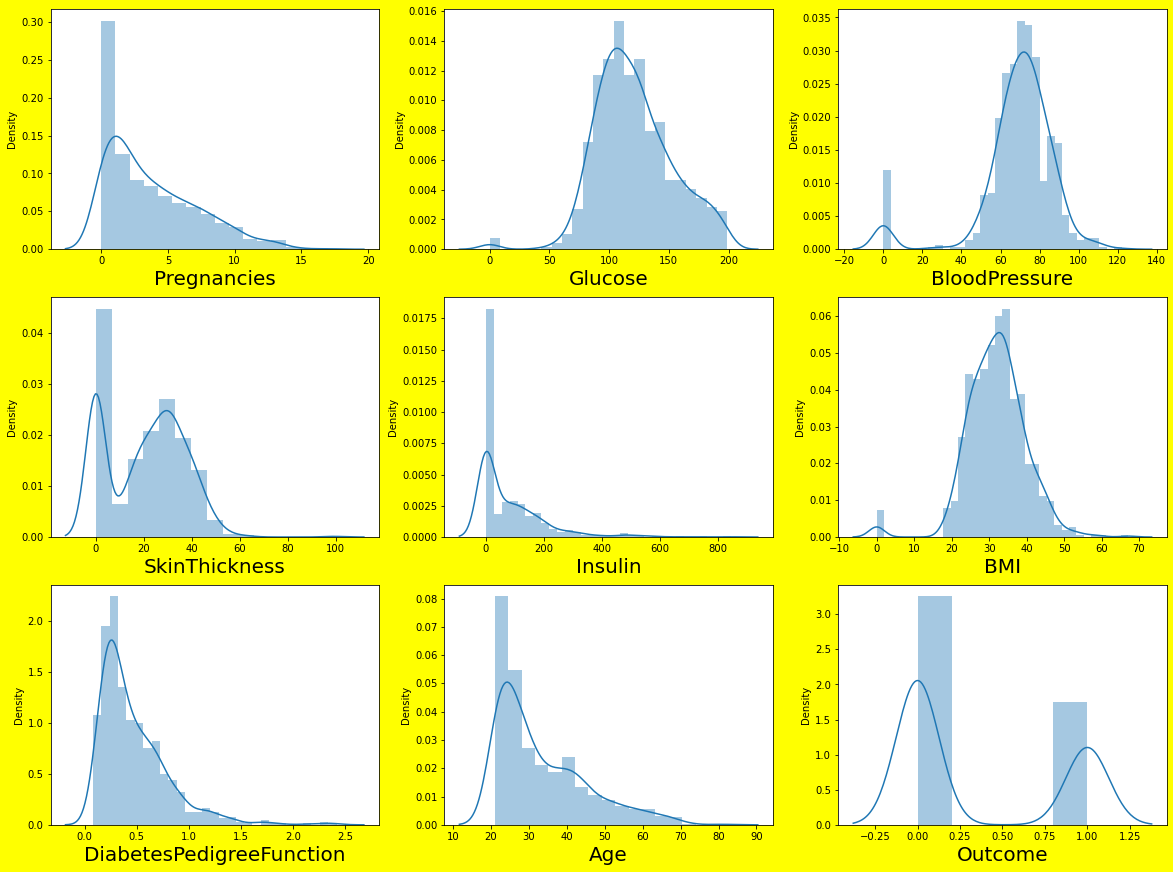

In [12]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * we can see there is some skewness in the data,lets deal with data.

# Also,we can see there few data for column Glucose,Insulin,Thickness,BMI, and Blood pressure which have value as 0 . that's not possible. you can do aquick search to see that one cannot have 0 values for there let's deal with that. we can either remove such data or simiply replace if their respective mean values let's do the letter

In [13]:
# repalcing Zero values with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

# let's see how data is distributed for every column.

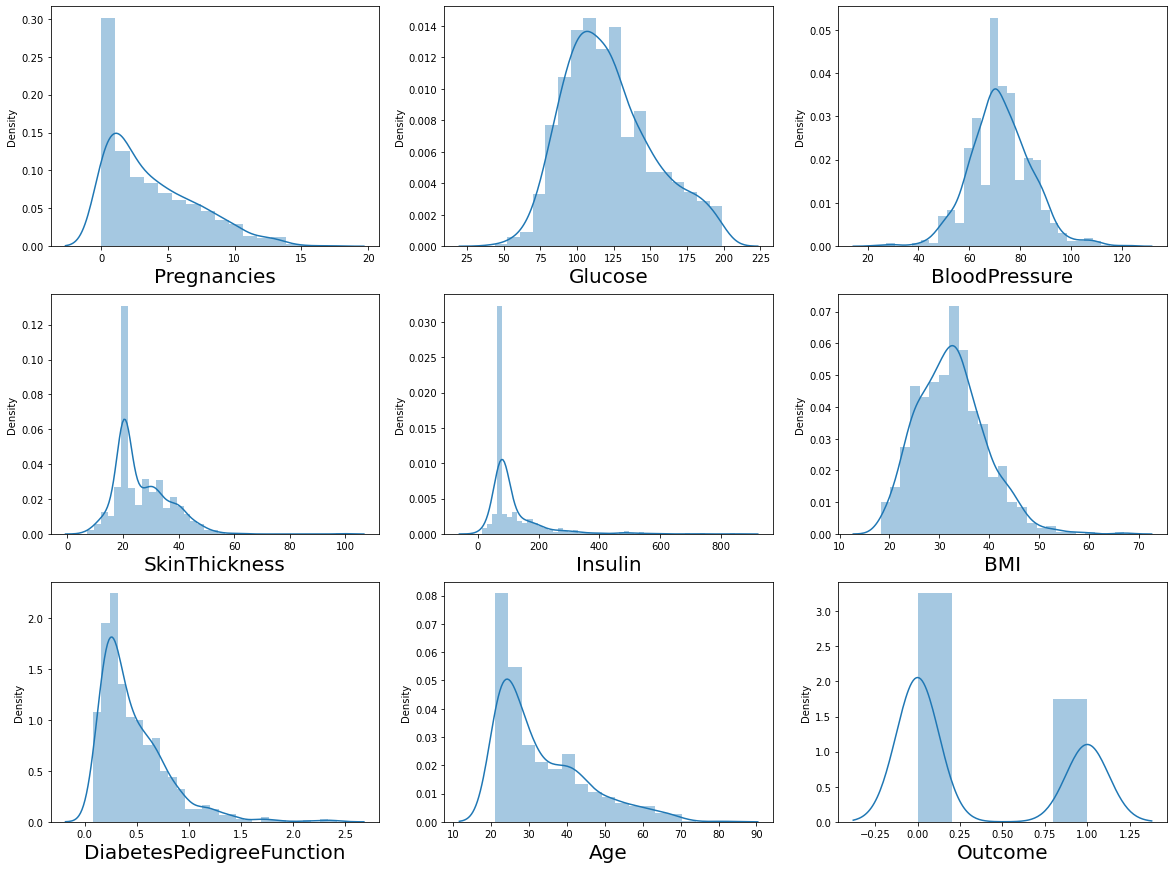

In [14]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# ^ Now we have dealt with the 0 value and data looks better . but still are outliers present in some column let's deal with them.

In [15]:
df_features = data.drop('Outcome',axis=1)

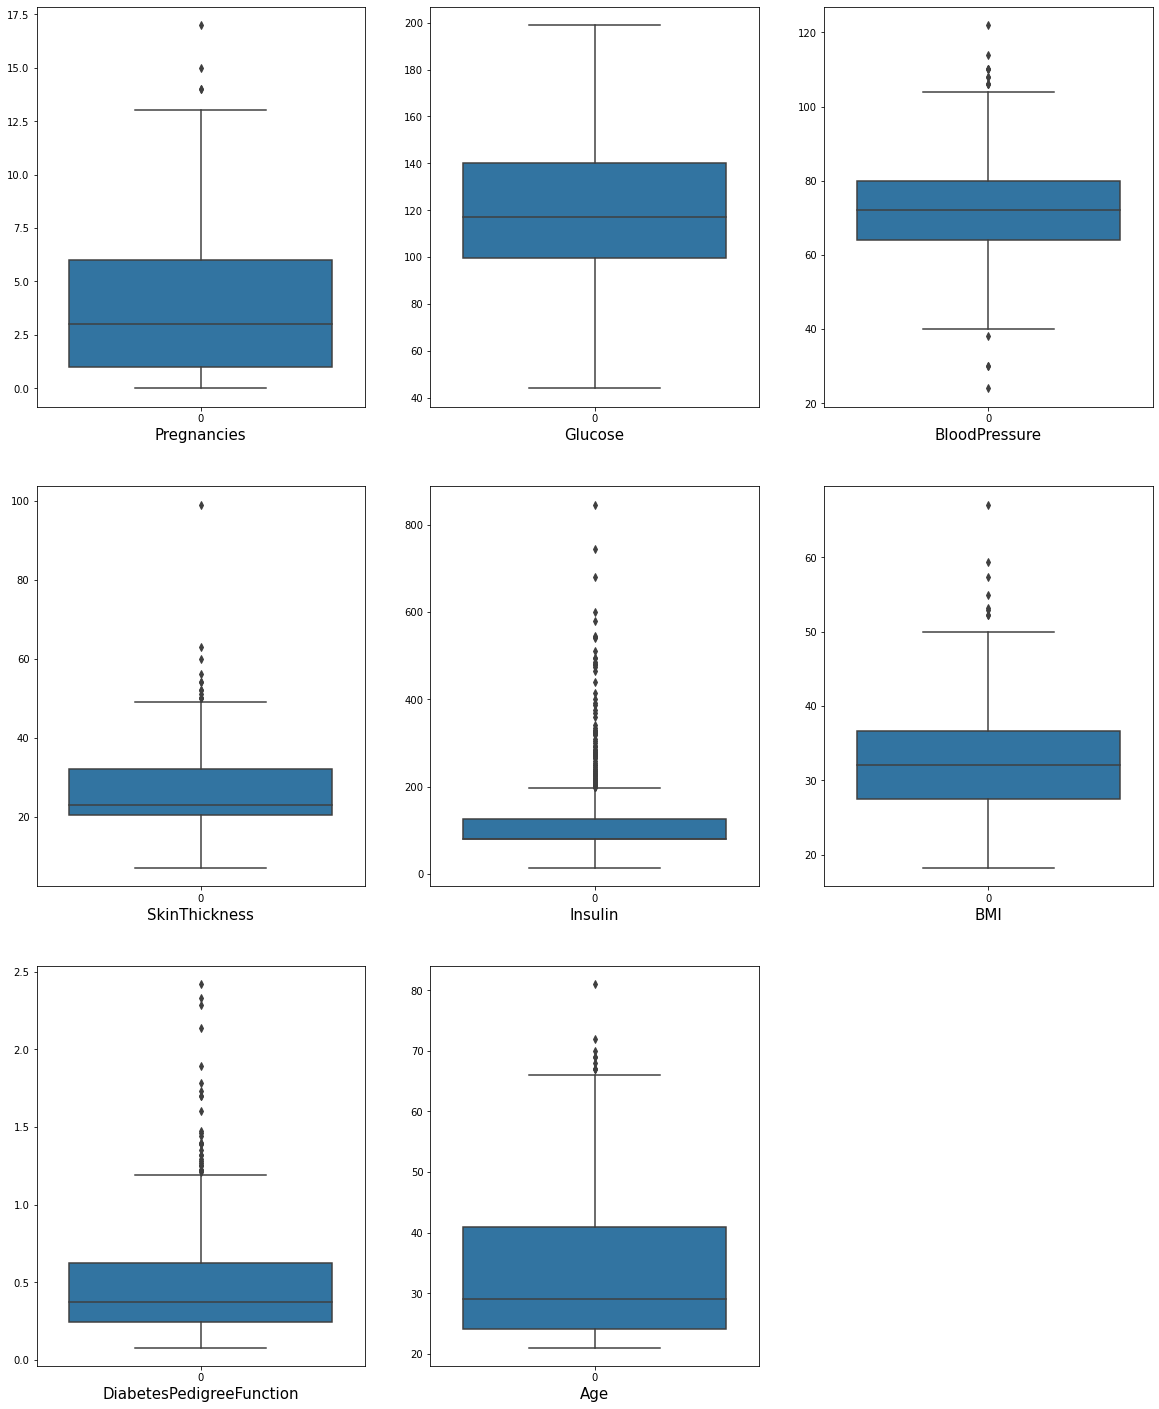

In [18]:
plt.figure(figsize=(20,25))
graph=1

for column in df_features:
    if graph <=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [19]:
data.shape

(768, 9)

# * Find the IQR (inter quantile range) to identify outliers

In [20]:
# 1st quantile
q1=data.quantile(0.25)

In [21]:
# 3rd quantile
q3=data.quantile(0.75)

In [22]:
# IQR
iqr= q3-q1

# * Outlier Detection Formula

# Higher side ==> Q3 + (1.5 * IQR)
# Lower side ++> Q1 - (1.5 * IQR)

In [23]:
print(q1)

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64


In [24]:
print(q3)

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64


In [25]:
print(iqr)

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


In [27]:
# Validating one Outlier

preg_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

# ^ Outliers kon se point se start ho rha hai 

In [28]:
# Check the indexes which have higher values

index=np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int32),)

# ^ kon kon se index me hai Outliers

In [29]:
# Drop the index which we found in the above cell 

data=data.drop(data.index[index])

data.shape

(764, 9)

# ^ Delete kar rhe hai outliers ko

In [31]:
data.reset_index()

# phir last me reset kar rhe ha index ko 
# reset krna import hai

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [33]:
#  Bloodpressure

bp_high=(q3.BloodPressure+(1.5*iqr.BloodPressure))
print(bp_high)

index=np.where(data['BloodPressure'] > bp_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [34]:
# skinThickness

st_high=(q3.SkinThickness+(1.5*iqr.SkinThickness))
print(st_high)

index=np.where(data['SkinThickness'] > st_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [35]:
# Insulin

insu_high=(q3.Insulin+(1.5*iqr.Insulin))
print(insu_high)

index=np.where(data['Insulin'] > insu_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [36]:
# bmi

bmi_high=(q3.BMI+(1.5*iqr.BMI))
print(bmi_high)

index=np.where(data['BMI'] > bmi_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
# Diabetes pedigree function

dpf_high=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(dpf_high)

index=np.where(data['DiabetesPedigreeFunction'] > dpf_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [38]:
# Age

age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)

index=np.where(data['Age'] > age_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [39]:
# bloodpressure low 

bp_low=(q1.BloodPressure-(1.5*iqr.BloodPressure))
print(bp_low)

index=np.where(data['BloodPressure'] < bp_low)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


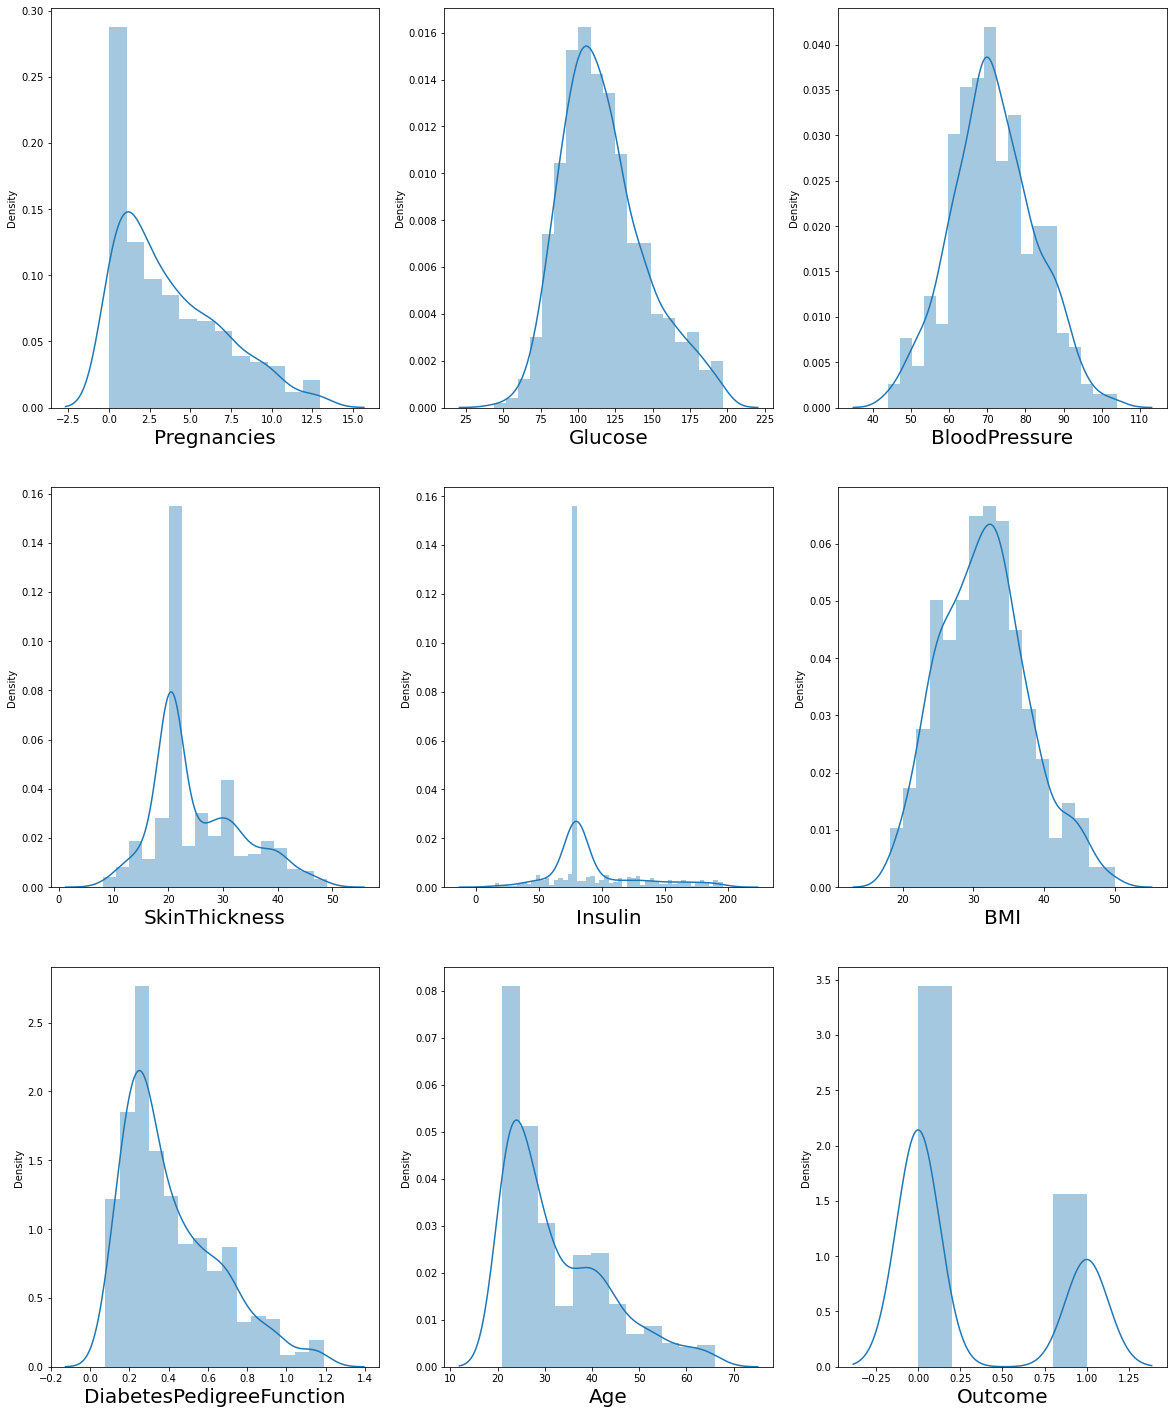

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# ^ the data looks much better now than before. we did start our analysis with data now as we didn't want to lose important information. if our model doesn't work with accuracy, we will come back for more preprocessing

# * Finding relationship. we want to keep only those feature which have relationship with label.

In [41]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

# * Before we fit our data to a model let's visulazise the relation between our independent variabe and the categories.

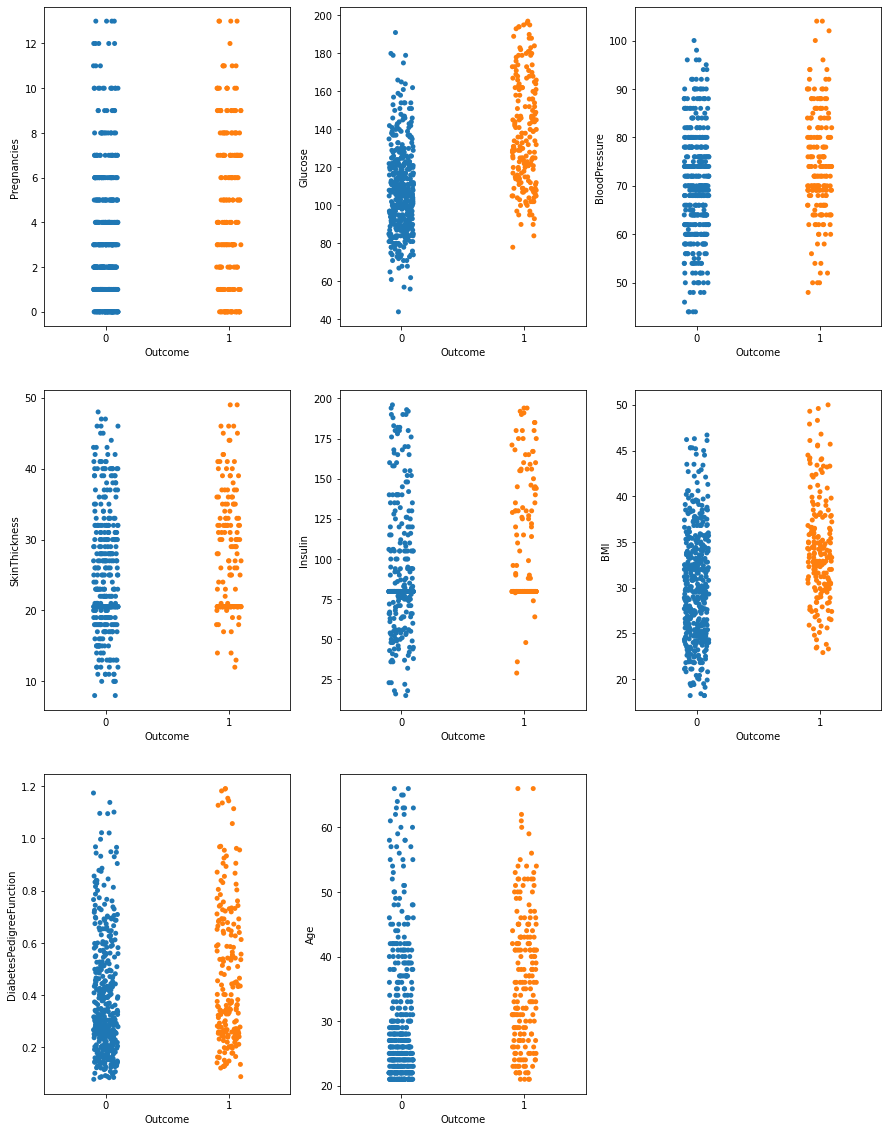

In [42]:
# let's see how feature are related to class

plt.figure(figsize=(15,20))
plotnumber=1

for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# Great!! lets proceed by checking Multicollinearity in the dependent variable. before that we shold scale or data .lets use the standard scaler for that

# * check Multicollinearity problem. find if one feature is dependent on another feature.

# multicollinearity mean = feature vs feature

In [43]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# This is how our data looks now after scaling . Great, now we will check for Multicollinearity using vif (variance inflation factor)

In [44]:
x_scaled.shape

(619, 8)

In [45]:
# Finding variance inflation factor in each scaled column i.e x_scaled.shape[1] (1/(1-R2))

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


# All the vif values are less than 5 and are very low that mean no multicollinearity . now we can go ahead with fitting our data to the model.before that let's split our data in test and training set.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [47]:
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

# lets see how well our model perform on the test data set.

In [48]:
y_pred=log_reg.predict(x_test)

y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

# * model Accuracy

In [49]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

# * Confusion matrix

In [50]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [51]:
# ** Ky Ky find kiya humne is project me
# 1) mean & std
# 2) distribution
# 3) 0 replace mean
# 4) 0 outliers
# 5) boxplot
# 6) reverse outlier
# 7) distplot